# KMeans Clustering

# Random Data Points

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


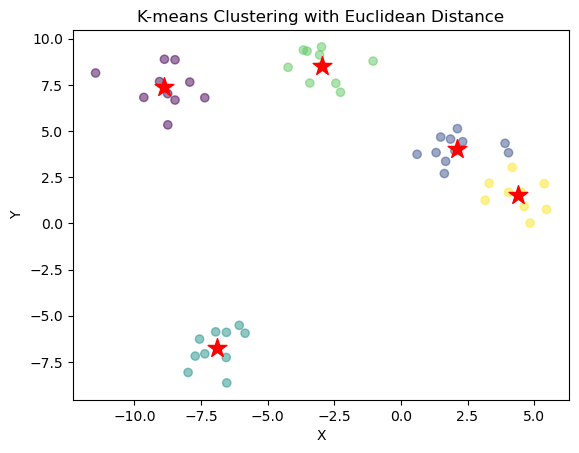

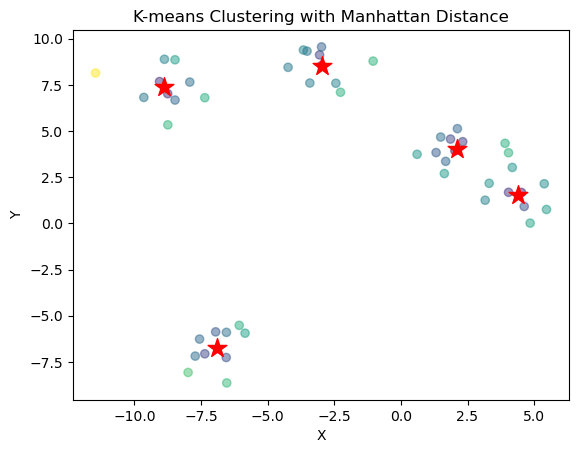

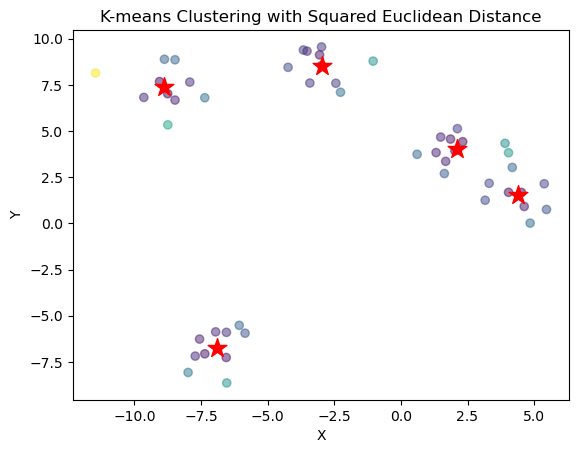

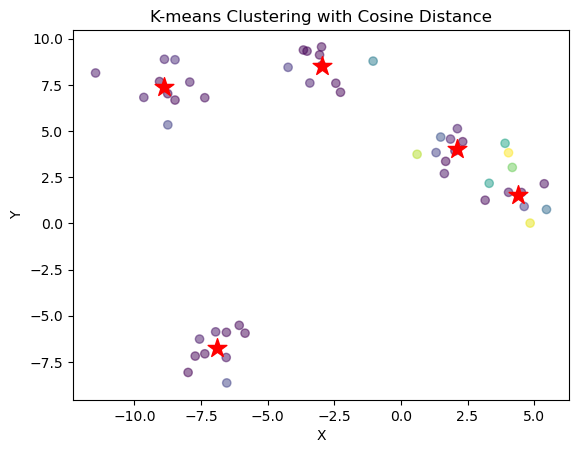

In [35]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin_min
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Function to plot clusters and centroids
def plot_clusters(data, centroids, labels, title):
    plt.figure()
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red', s=200)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# Generate sample data points with multiple clusters
data_points, _ = make_blobs(n_samples=50, centers=5, cluster_std=1.0, random_state=42)

# Number of clusters
k = 5

# Euclidean distance measure
kmeans_euclidean = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
kmeans_euclidean.fit(data_points)
centroids_euclidean = kmeans_euclidean.cluster_centers_
labels_euclidean = kmeans_euclidean.labels_

# Plot clusters and centroids for Euclidean distance
plot_clusters(data_points, centroids_euclidean, labels_euclidean, "K-means Clustering with Euclidean Distance")

# Manhattan distance measure
distances_manhattan = pairwise_distances_argmin_min(data_points, kmeans_euclidean.cluster_centers_, metric='manhattan')[1]

# Plot clusters and centroids for Manhattan distance
plot_clusters(data_points, kmeans_euclidean.cluster_centers_, distances_manhattan, "K-means Clustering with Manhattan Distance")

# Squared Euclidean distance measure
distances_squared_euclidean = pairwise_distances_argmin_min(data_points, kmeans_euclidean.cluster_centers_, metric='sqeuclidean')[1]

# Plot clusters and centroids for Squared Euclidean distance
plot_clusters(data_points, kmeans_euclidean.cluster_centers_, distances_squared_euclidean, "K-means Clustering with Squared Euclidean Distance")

# Cosine distance measure
distances_cosine = pairwise_distances_argmin_min(data_points, kmeans_euclidean.cluster_centers_, metric='cosine')[1]

# Plot clusters and centroids for Cosine distance
plot_clusters(data_points, kmeans_euclidean.cluster_centers_, distances_cosine, "K-means Clustering with Cosine Distance")


In [3]:
import pandas as pd
import numpy as np
import pylab as pl
from sklearn import datasets
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [4]:
iris = datasets.load_iris()
x = pd.DataFrame(iris.data)
x.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
x.columns = ['sepal_length','sepal_width','petal_length','petal_width']
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

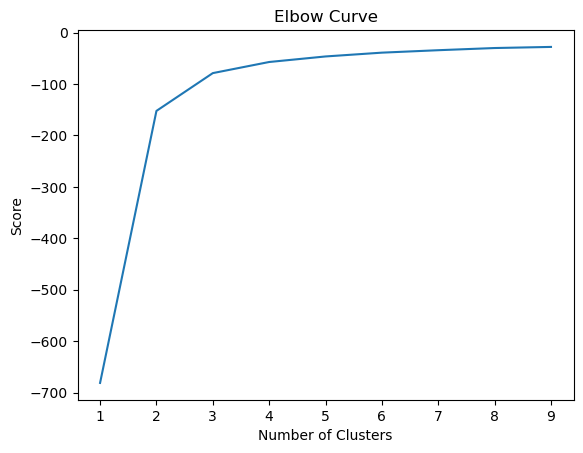

In [8]:
Nc = range(1, 10)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]

score

pl.plot(Nc,score)

pl.xlabel('Number of Clusters')

pl.ylabel('Score')

pl.title('Elbow Curve')

pl.show()

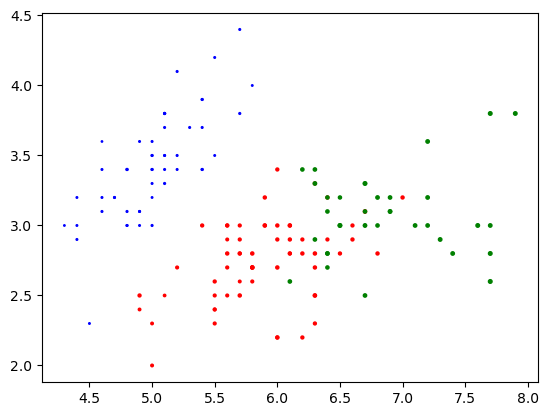

In [9]:
model = KMeans(n_clusters = 3)
model.fit(x)
model.labels_

colormap = np.array(['Red', 'Blue', 'Green'])
z = plt.scatter(x.sepal_length, x.sepal_width, x.petal_length, c = colormap[model.labels_])

In [10]:
accuracy_score(iris.target,model.labels_)

0.24

In [11]:
x.insert(4,"class",model.labels_)
x.replace({'class': {0: "Iris-setosa", 1: "Iris-versicolor", 2: "Iris-virginica"}})

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-versicolor
1,4.9,3.0,1.4,0.2,Iris-versicolor
2,4.7,3.2,1.3,0.2,Iris-versicolor
3,4.6,3.1,1.5,0.2,Iris-versicolor
4,5.0,3.6,1.4,0.2,Iris-versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-setosa
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
